# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_10046/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

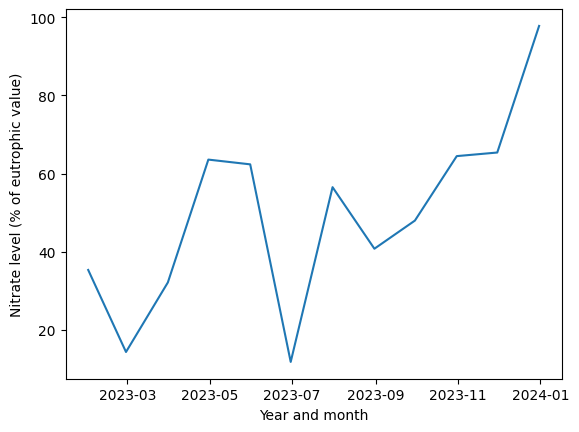

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_10046/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

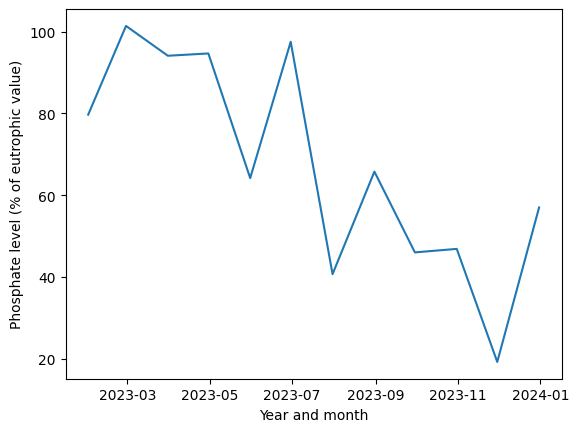

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

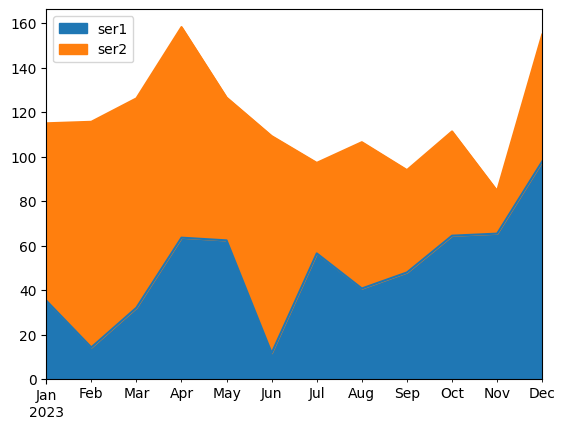

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# Area plot vs Line Graphs

## Area Plot
### Advantages
Area plots offer clear visual advantages when tracking chemical concentrations over time. They effectively convey the magnitude of each chemical, allowing viewers to quickly identify periods of higher or lower levels. When stacked, they also show the combined total concentration, with the top boundary representing the sum—useful for assessing overall water quality. Additionally, the relative size of each area helps highlight which chemical is more dominant at any point in time.

### Disadvantages
However, area plots also come with drawbacks. They can obscure individual trends, especially if one chemical is consistently lower or stacked on top, making it harder to see exact values or fluctuations. The upper series in a stacked plot lacks a clear baseline, which makes interpreting its values more difficult. Moreover, area plots often imply a part-to-whole relationship, which may be misleading in this context since nitrate and phosphate are distinct substances with their own significance.

## Line Graphs
### Advantages
Line plots offer a clear and precise way to visualize individual chemical trends over time. Each line distinctly represents one chemical, making it easy to observe independent fluctuations, patterns, and shifts without interference. This format also allows for straightforward comparisons at specific time points, such as identifying when one chemical's level surpasses the other's. Additionally, because lines don't typically obscure each other (unless they overlap exactly), all data points remain visible and easy to interpret.

### Disadvantages
However, line plots have some limitations. If displayed in separate graphs, they can take up significant space, which may not be ideal for compact dashboards or reports. Unlike stacked area plots, they don’t immediately convey the combined concentration; users must mentally sum the values to understand the total. Furthermore, while comparisons are possible, it’s less visually intuitive to assess the relative magnitude or contribution of each chemical at a glance.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_cca =pd.read_csv("extracted_data_cca/Application_Data.csv")

In [15]:
# Numerical columns for correlation and plots
numerical_cols = df_cca.select_dtypes(include=['number'])

# Ensure the selected numerical columns actually exist in the DataFrame
numerical_cols = [col for col in numerical_cols if col in df_cca.columns]

In [16]:
# Identify the hue column
hue_col = 'Status'
if hue_col in df_cca.columns:
    if df_cca[hue_col].nunique() <= 10: # Check if it has a reasonable number of unique values for hue
        print(f"Using '{hue_col}' for hue in scatter/pairplots. Unique values: {df_cca[hue_col].unique()}")
    else:
        print(f"'{hue_col}' has too many unique values ({df_cca[hue_col].nunique()}) for an effective hue. Not using hue.")
        hue_col = None
else:
    print(f"'{hue_col}' column not found. Scatterplots/Pairplots will not use hue.")
    hue_col = None

Using 'Status' for hue in scatter/pairplots. Unique values: [1 0]


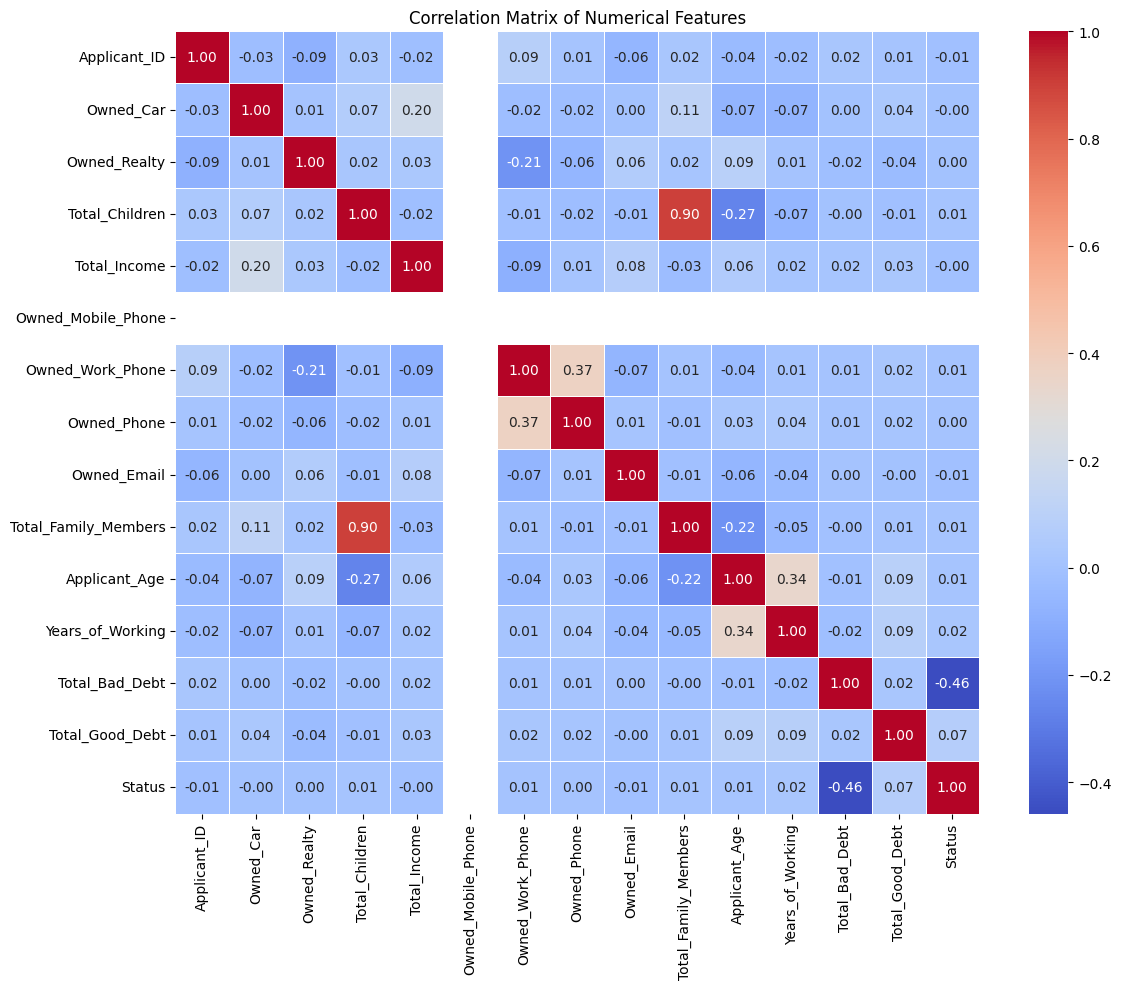

In [17]:
# Find Correlations Between Pairs of Variables
df_numerical_for_corr = df_cca[numerical_cols].dropna()
correlation_matrix = df_numerical_for_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

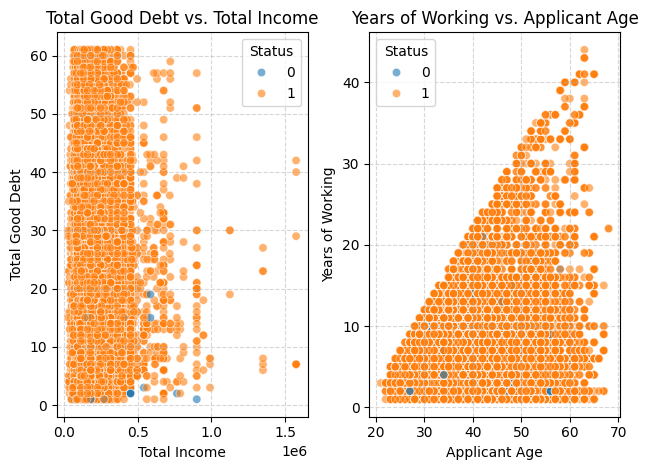

In [10]:
# Scatterplot 1: Total_Income vs. Total_Good_Debt
if 'Total_Income' in df_cca.columns and 'Total_Good_Debt' in df_cca.columns:
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.scatterplot(x='Total_Income', y='Total_Good_Debt', data=df_cca, alpha=0.6, hue=hue_col)
    plt.title('Total Good Debt vs. Total Income')
    plt.xlabel('Total Income')
    plt.ylabel('Total Good Debt')
    plt.grid(True, linestyle='--', alpha=0.5)
else:
    print("\nSkipping 'Total Good Debt vs. Total Income' scatterplot: Required columns not found.")

# Scatterplot 2: Applicant_Age vs. Years_of_Working
if 'Applicant_Age' in df_cca.columns and 'Years_of_Working' in df_cca.columns:
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.scatterplot(x='Applicant_Age', y='Years_of_Working', data=df_cca, alpha=0.6, hue=hue_col)
    plt.title('Years of Working vs. Applicant Age')
    plt.xlabel('Applicant Age')
    plt.ylabel('Years of Working')
    plt.grid(True, linestyle='--', alpha=0.5)
else:
    print("\nSkipping 'Years of Working vs. Applicant Age' scatterplot: Required columns not found.")

plt.tight_layout()
plt.show()


Pairplot for Selected Numerical Variables


/tmp/ipykernel_10046/4011662400.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


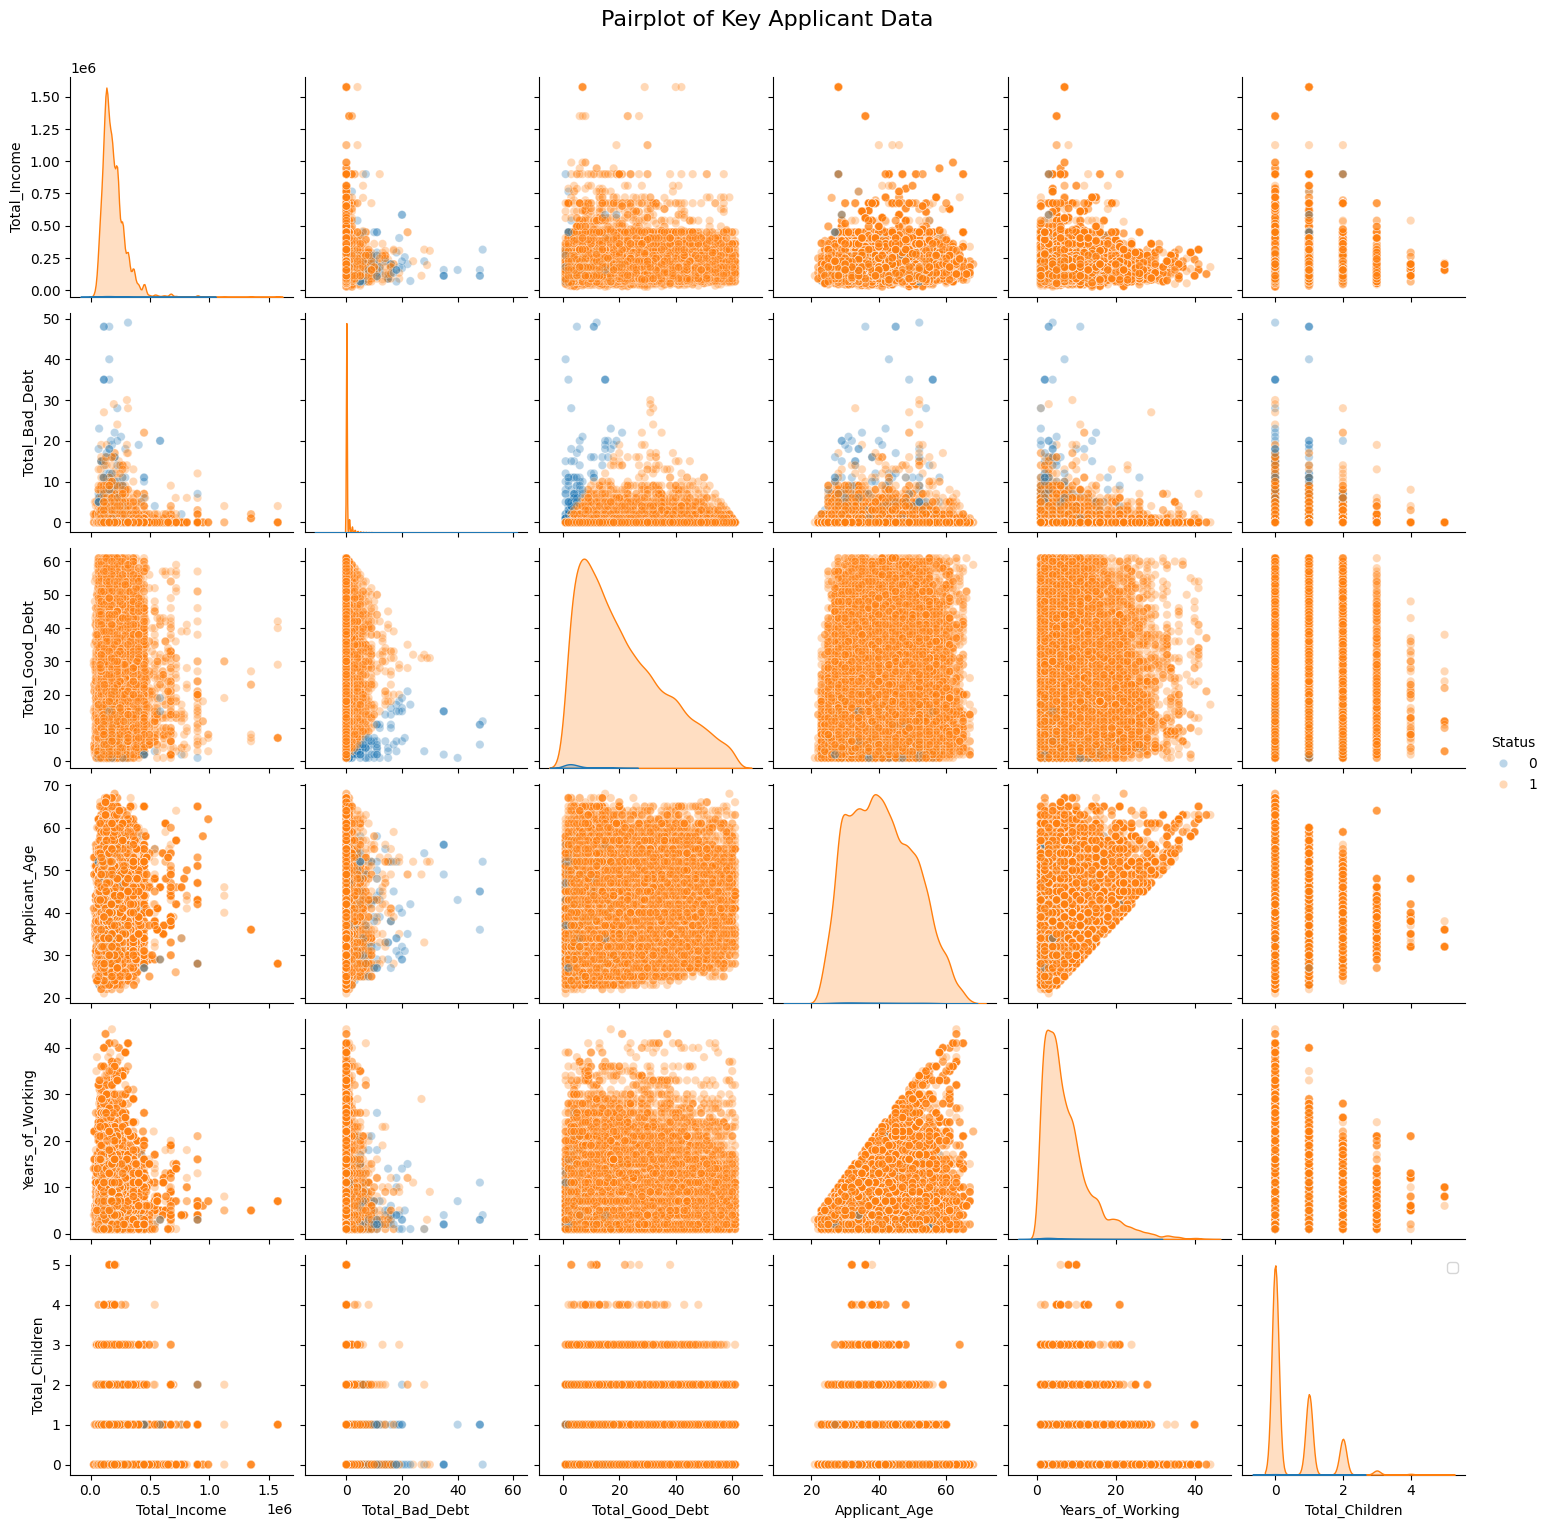

In [20]:
# Draw Pairplots
print("\nPairplot for Selected Numerical Variables")
# Prioritize columns that are likely to have interesting relationships.
pairplot_vars_selection = [
    'Total_Income', 'Total_Bad_Debt', 'Total_Good_Debt',
    'Applicant_Age', 'Years_of_Working', 'Total_Children'
]
pairplot_vars = [col for col in pairplot_vars_selection if col in df_cca.columns]

if len(pairplot_vars) > 1:
    sns.pairplot(df_cca, vars=pairplot_vars, hue=hue_col, plot_kws={'alpha': 0.3}, diag_kind='kde')
    plt.suptitle('Pairplot of Key Applicant Data', y=1.02, fontsize=16) 
    plt.legend()
    plt.show()
else:
    print("Not enough suitable numerical columns for a meaningful pairplot with the given columns.")


--- Average Total Income by Applicant Age Group ---


/tmp/ipykernel_10046/2451646101.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_age = df_cca.groupby('Age_Group')['Total_Income'].mean().reset_index()


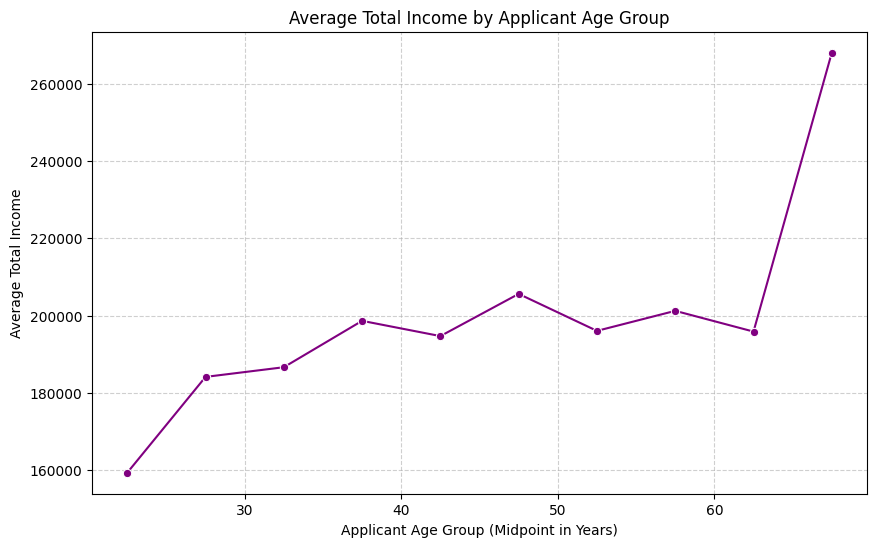

In [12]:
# Line Graphs and/or Area Graphs (Time Series Analysis) 
if 'Applicant_Age' in df_cca.columns and 'Total_Income' in df_cca.columns:
    print("\n--- Average Total Income by Applicant Age Group ---")
    df_cca['Age_Group'] = pd.cut(df_cca['Applicant_Age'], bins=np.arange(15, df_cca['Applicant_Age'].max() + 5, 5), right=False)
    avg_income_by_age = df_cca.groupby('Age_Group')['Total_Income'].mean().reset_index()
    # Get midpoint for plotting
    avg_income_by_age['Age_Midpoint'] = avg_income_by_age['Age_Group'].apply(lambda x: x.mid)

    # Sort by Age_Midpoint to ensure line plot connects correctly
    avg_income_by_age = avg_income_by_age.sort_values('Age_Midpoint')

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Age_Midpoint', y='Total_Income', data=avg_income_by_age, marker='o', color='purple')
    plt.title('Average Total Income by Applicant Age Group')
    plt.xlabel('Applicant Age Group (Midpoint in Years)')
    plt.ylabel('Average Total Income')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Conclusion

The data seems to be usable. Outliers seem to be scattered across due to mainly income differences. Since income varies widely, there are going to be people who earn a lot than the average. However, most of the applicant data is under 100k/yr. As for correlation, the highest correlation is number of total children and YOE. Which makes sense because people who are tenured in their positions are older and more likely to have more children compared to someone who is freshly graduated (low YOE). For the line graph, it seems to be that as the older someone get (as time passes), the are more likely to make more per year. Confounding variables that come to mind are Location, Type of Loan, Economic Conditions, and Applicant's Financial Behavior. Location is important because cost of living (COL) and earning potential vary greatly from state to state, even from different cities. Type of loans are important too because of the type of loan has typical amount, for example a mortage (home loan) are ~$400,000 while personal loans are ~$7,500, this directly affects income-to-debt ratios. Economic conditions and applicant finanical behaviors are important too because external factors could affect Total_Income, Total_Bad_Debt, Total_Good_Debt, and critically, the Status as well as financial behavior, aka total bad debt vs good debt. 



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

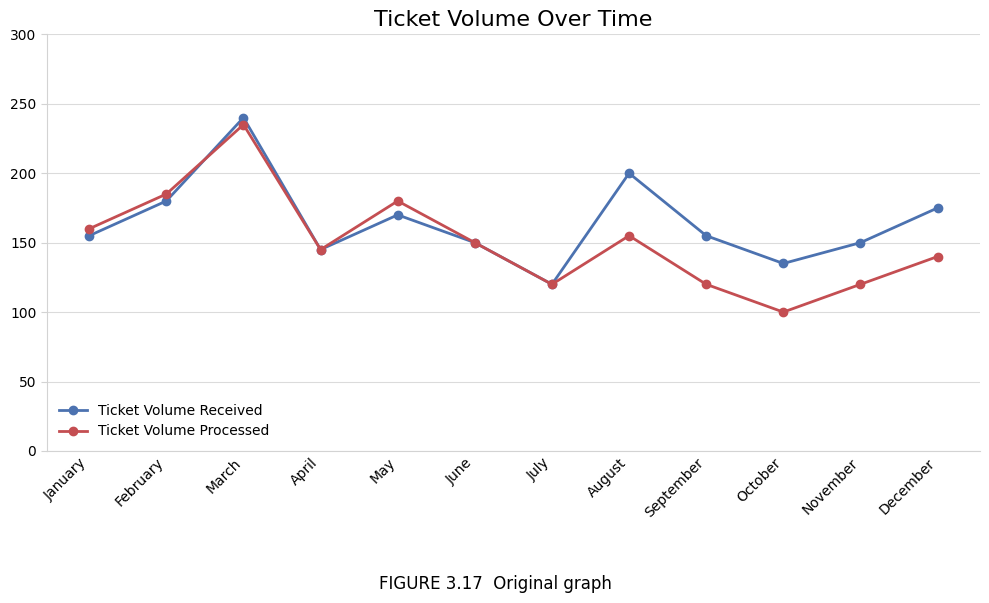

In [13]:
# Months of the year
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Approximate data points based on FIGURE 3.17
# Ticket Volume Received (blue line)
ticket_received = np.array([
    155, 180, 240, 145, 170, 150,
    120, 200, 155, 135, 150, 175
])

# Ticket Volume Processed (red line)
ticket_processed = np.array([
    160, 185, 235, 145, 180, 150,
    120, 155, 120, 100, 120, 140
])

# Create a DataFrame
df_tickets = pd.DataFrame({
    'Month': months,
    'Ticket Volume Received': ticket_received,
    'Ticket Volume Processed': ticket_processed
})

# Convert 'Month' to a categorical type for proper ordering in plots
df_tickets['Month'] = pd.Categorical(df_tickets['Month'], categories=months, ordered=True)

# Create the Plot
plt.figure(figsize=(10, 6)) 
plt.plot(df_tickets['Month'], df_tickets['Ticket Volume Received'],
         marker='o', markersize=6, linewidth=2,
         color='#4C72B0', 
         label='Ticket Volume Received')
plt.plot(df_tickets['Month'], df_tickets['Ticket Volume Processed'],
         marker='o', markersize=6, linewidth=2,
         color='#C44E52', 
         label='Ticket Volume Processed')



plt.title('Ticket Volume Over Time', fontsize=16, loc='center')
plt.ylabel('', fontsize=12) 
plt.yticks(np.arange(0, 301, 50), fontsize=10) 
plt.ylim(0, 300) 
plt.xlabel('', fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.grid(axis='y', linestyle='-', color='lightgray', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('lightgray') 
plt.gca().spines['left'].set_color('lightgray')   
plt.tick_params(axis='x', length=0) 
plt.tick_params(axis='y', length=4, color='lightgray') 
plt.legend(loc='lower left', ncol=1, frameon=False, fontsize=10)
plt.figtext(0.5, 0.01, 'FIGURE 3.17  Original graph', ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0.1, 1, 1]) 
plt.show()
